<a href="https://colab.research.google.com/github/moodychinsaki/MLprojectt/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier 🐶
 :*Machine Learning CNN Project.* 🐱 :

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import gc
from os import listdir, makedirs
from os.path import isfile, join
import pandas as pd
from PIL import Image
import glob
from pathlib import Path
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.optimizers import SGD, RMSprop
import cv2
from os.path import isfile,join, exists
import zipfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import statistics as st






In [ ]:
pip uninstall keras-preprocessing -y

In [ ]:
pip install -q -U git+https://github.com/keras-team/keras-preprocessing.git

  Preparing metadata (setup.py) ... done


In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

## Get the data from cloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CatsDogs.zip', 'r') # Open the zip file containing all the images
zip_ref.extractall('/tmp') # Extract the file in /tmp folder
zip_ref.close()

In [ ]:
print("Cats photos :" +str(len(os.listdir('./../tmp/CatsDogs/Cats'))))
print("Dogs photos :" +str(len(os.listdir('./../tmp/CatsDogs/Dogs'))))


Cats photos :12500
Dogs photos :12500


## Removing corrupted images

In [ ]:
# Assignment of paths
cat_path = glob.glob("./../tmp/CatsDogs/Cats/*.jpg")
dog_path = glob.glob("./../tmp/CatsDogs/Dogs/*.jpg")
paths = list([cat_path, dog_path])

In [ ]:
#  generic code for removing corrupted images
num_skipped = 0
total = 0
for path in paths:
  for filename in path:
    if os.path.exists(filename):
      try:
        total += 1
        with open(filename, "rb") as fobj:
          is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
      except IOError:
        pass
      if not is_jfif:
        num_skipped += 1
        # Deleting corrupted image
        os.remove(filename)
 
print("deleted %d images out of %d total" % (num_skipped, total))


deleted 1590 images out of 25000 total


In [ ]:
# Print the number of photos in each class after remotion
print("Cats photos after remotion: " +str(len(os.listdir('/tmp/CatsDogs/Cats'))))
print("Dogs photos after remotion: " +str(len(os.listdir('/tmp/CatsDogs/Dogs'))))

Cats photos after remotion: 11741
Dogs photos after remotion: 11669


well stratified, almost equal to each other (# of Cats image and # of dogs image)

In [ ]:
PATH = '/tmp/CatsDogs/'
CATEGORIES = ['Cats', 'Dogs']

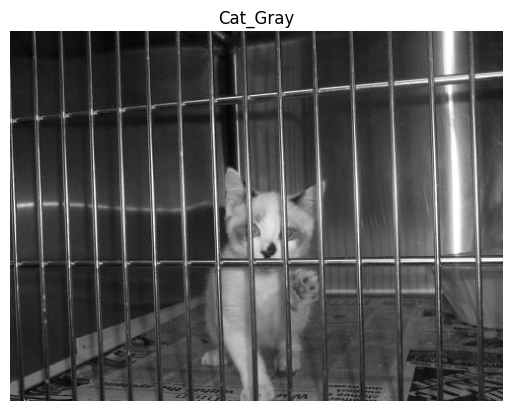

In [ ]:

#Check grayed and resized version of photos for cat


for category in CATEGORIES:                                                   
    path = os.path.join(PATH, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.title('Cat_Gray')
        plt.axis('off')
        plt.show()
        break
    break











Text(0.5, 0, 'shape: (150, 150)')

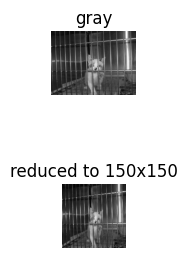

In [ ]:
plt.subplot(5,5,10)
plt.imshow(img_array, cmap='gray')
plt.title('gray')
plt.axis('off')
plt.xlabel('shape: {}'.format(img_array.shape))
plt.subplot(5,5,20)

IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.title('reduced to 150x150')
plt.axis('off')
plt.xlabel('shape: {}'.format(new_array.shape))
# 0 means cat 1 means dog

In [ ]:
training_data = []
class_list =[]

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(PATH,category) 
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
                class_list.append(class_num)
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

23410


In [ ]:
import random

random.shuffle(training_data)
import numpy as np 

In [ ]:
Features = []
Labels = []

for features, labels in training_data:
    Features.append(features)
    Labels.append(labels)

    
Features = np.array(Features).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Labels = np.array(Labels) # labels

# normalising the data
Features = Features/255


In [ ]:
# train test split
Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels,
                                                    stratify=Labels, 
                                                    test_size=0.20)

**Model 1 (Basic)**

In [ ]:
#from keras.models import Sequential
#from keras.layers import Conv2D
#from keras.layers import Activation
#from keras.layers import MaxPooling2D
#from keras.layers import Flatten
#from keras.layers import Dense

model1 = Sequential(name="MODEL_1")

model1.add(Conv2D(64, (3, 3), strides=(2, 2), input_shape = Features_train.shape[1:]))  # Excluding batch size for now.
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), strides=(2, 2)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())  
model1.add(Dense(10))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))



In [ ]:
model1.summary()


In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
fit1 = model1.fit(Features_train, Labels_train, batch_size=100, epochs=10, validation_split=0.15) 
# epochs and batch size modifiable but gpu and tpu issues on free google colab arise

Epoch 1/10
160/160 [==============================] - 170s 1s/step - loss: 0.6668 - accuracy: 0.5959 - val_loss: 0.6726 - val_accuracy: 0.6128
Epoch 2/10
160/160 [==============================] - 168s 1s/step - loss: 0.5778 - accuracy: 0.6995 - val_loss: 0.5424 - val_accuracy: 0.7299
Epoch 3/10
160/160 [==============================] - 167s 1s/step - loss: 0.5125 - accuracy: 0.7491 - val_loss: 0.5527 - val_accuracy: 0.7142
Epoch 4/10
160/160 [==============================] - 179s 1s/step - loss: 0.4803 - accuracy: 0.7689 - val_loss: 0.5038 - val_accuracy: 0.7473
Epoch 5/10
160/160 [==============================] - 170s 1s/step - loss: 0.4531 - accuracy: 0.7860 - val_loss: 0.4955 - val_accuracy: 0.7562
Epoch 6/10
160/160 [==============================] - 167s 1s/step - loss: 0.4299 - accuracy: 0.8017 - val_loss: 0.4738 - val_accuracy: 0.7730
Epoch 7/10
160/160 [==============================] - 167s 1s/step - loss: 0.3945 - accuracy: 0.8253 - val_loss: 0.4842 - val_accuracy: 0.7705

In [ ]:
gc.collect()

In [ ]:
def plot_loss_curves(*args):
    '''
    returns separate loss curves for training and validation metrics for multiple history objects
    '''
    plt.figure(figsize=(20,7))
    
    # plot loss data
    plt.subplot(1,2,1)
    for i, fit in enumerate(args):
        train_loss = fit.history['loss']
        val_loss = fit.history['val_loss']
        epochs = range(1,len(fit.history['loss'])+1)
        plt.plot(epochs, train_loss, label=f"training_loss_Model{i+1}")
        plt.plot(epochs, val_loss, label=f"validation_loss_Model{i+1}")
    plt.title("Model 1 Loss curves")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    
    # plot accuracy data
    plt.subplot(1,2,2)
    for i, fit in enumerate(args):
        train_accuracy = fit.history['accuracy']
        val_accuracy = fit.history['val_accuracy']
        epochs = range(1,len(fit.history['loss'])+1)
        plt.plot(epochs, train_accuracy, label=f"training_acc_Model{i+1}")
        plt.plot(epochs, val_accuracy, label=f"validation_acc_Model{i+1}")
    plt.title("Model 1 Accuracy curves")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()



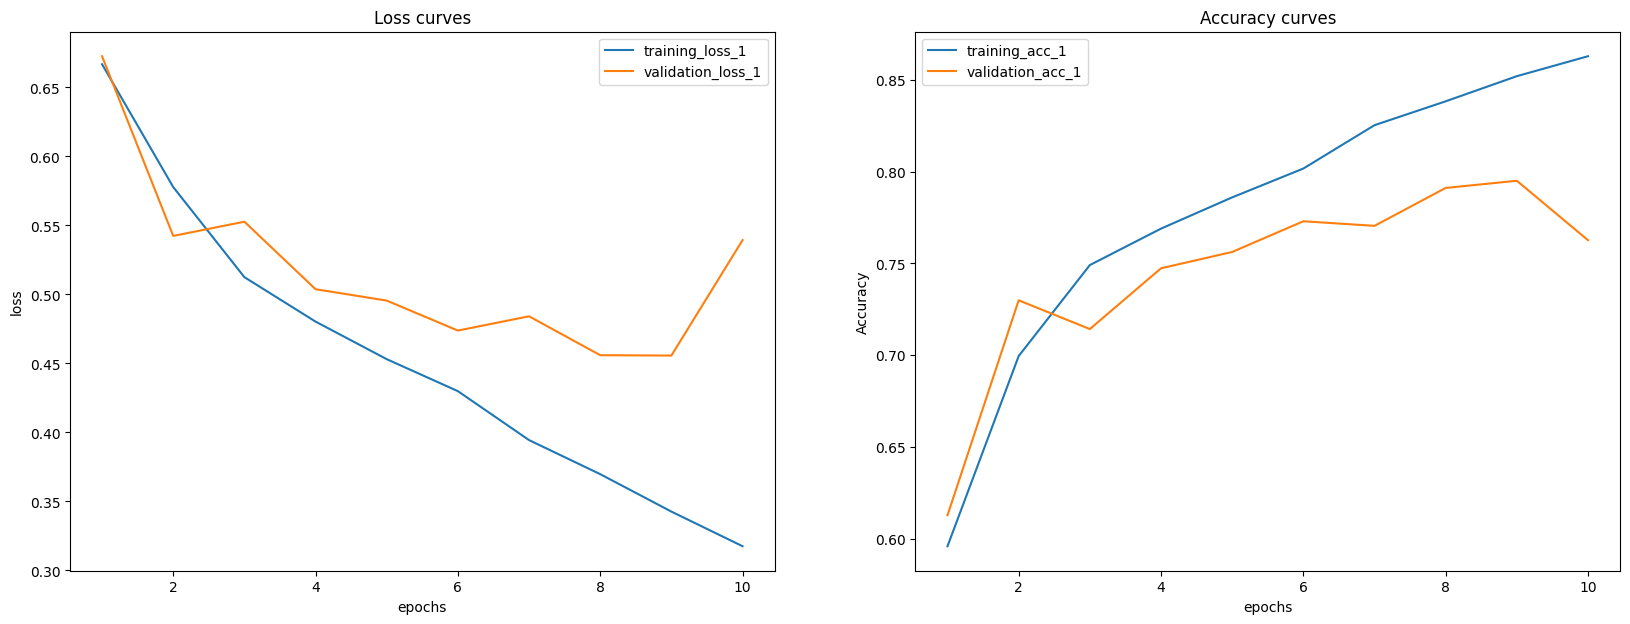

In [ ]:
plot_loss_curves(fit1)

In [ ]:
score = model1.evaluate(Features_test, Labels_test, verbose=0)
print(score)

NameError: ignored